
1个油桶, 我们根据体积在计算 油进去的速率 .

1. 首先根据随时间变化的 体积 计算出 流速随时间变化的函数
2. 再做相反的工作, 根据函数 利用积分反过来计算 累积体积



## 1. 根据体积计算平均的流速

先假设 用 python 函数 `volume` 来表示.

- 函数的参数是 时间, 单位是 `h` ;
- 函数的值是油量, 单位是 `bbl` 桶;


### 1.1 实现 average_flow_rate 函数 .


$$
从 t1 到 t2 的平均流速 = (V(t_2) - V(t_1) / (t2 -t1)
$$


In [320]:
def volume(t):
    """
    体积函数
    """
    return (t - 4) ** 3 / 64 + 3.3


def flow_rate(t):
    """
    流速函数, 上面体积函数的导数
    """
    return 3 * (t - 4) ** 2 / 64


def average_flow_rate(v, t1, t2):
    """
    参数 v 是流速函数 .
    """
    return (v(t2) - v(t1)) / (t2 - t1)


v4 = volume(4)
v9 = volume(9)
avg = average_flow_rate(volume, 4, 9)

print(f"v4: {v4} bbl, v9:{v9} bbl, avg_flow_rate:{avg} bbl/h")

v4: 3.3 bbl, v9:5.253125 bbl, avg_flow_rate:0.390625 bbl/h


### 1.2 用割线 描绘平均流速

割线: 就是体积图, 直接2点连起来的直线 .

同时 定义斜率 .和计算平均流速的方法 完全相同 .


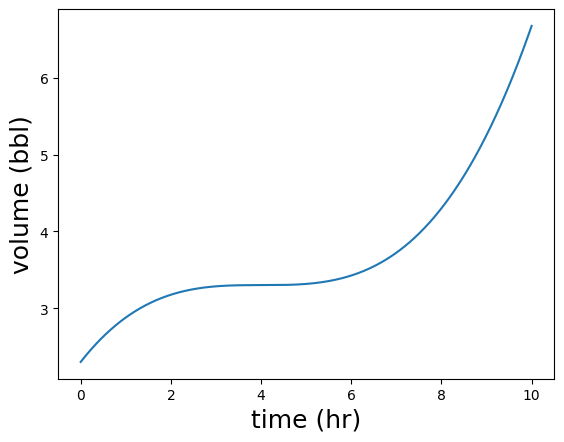

In [321]:
import matplotlib.pyplot as plt
import numpy as np


def plot_function(f, tmin, tmax, tlabel=None, xlabel=None, axes=False, **kwargs):
    ts = np.linspace(tmin, tmax, 1000)
    if tlabel:
        plt.xlabel(tlabel, fontsize=18)
    if xlabel:
        plt.ylabel(xlabel, fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax - tmin
        plt.plot([tmin - total_t / 10, tmax + total_t / 10], [0, 0], c='k', linewidth=1)
        plt.xlim(tmin - total_t / 10, tmax + total_t / 10)
        xmin, xmax = plt.ylim()
        plt.plot([0, 0], [xmin, xmax], c='k', linewidth=1)
        plt.ylim(xmin, xmax)


def plot_volume(f, tmin, tmax, axes=False, **kwargs):
    plot_function(f, tmin, tmax, tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)


def plot_flow_rate(f, tmin, tmax, axes=False, **kwargs):
    plot_function(f, tmin, tmax, tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)


plot_volume(volume, 0, 10)

### 1.3 计算负变化率

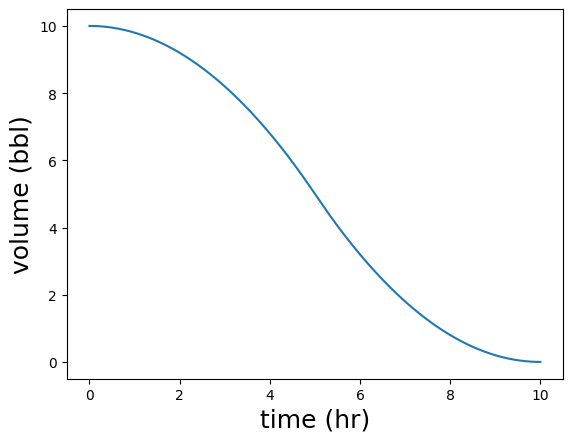

In [322]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2


plot_volume(decreasing_volume, 0, 10)

### 1.4 execs

**exec1:** 实现一个 `python` 函数 `secant_line(f, x1, x2)` 接收函数 `f(x)` 和 2个值 x1, x2 , 返回1个随时间变化 割线的新函数 .


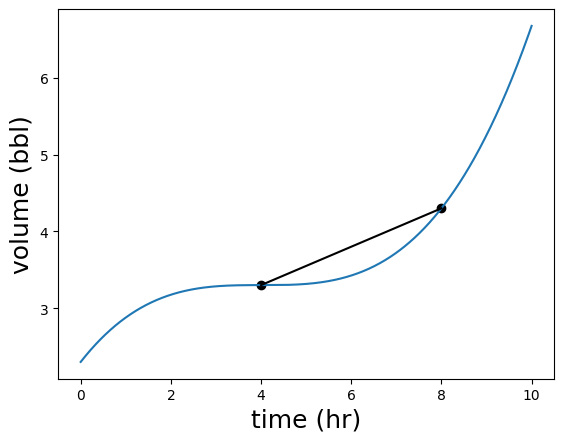

In [323]:
def secant_line(f, x1, x2):
    def line(x):
        secant = (f(x2) - f(x1)) / (x2 - x1)
        return f(x1) + (x - x1) * secant

    return line


def plot_secant(f, x1, x2, color='k'):
    line = secant_line(f, x1, x2)
    ## 1. 画出直线
    plot_function(line, x1, x2, c=color)
    ## 2. 画 2个端点
    plt.scatter(
        [x1, x2],
        [f(x1), f(x2)],
        c=color
    )


plot_volume(volume, 0, 10)
plot_secant(volume, 4, 8)

## 2. 时间变化的平均流速

主要目的 就是从体积函数得到 流速函数 .

基本思路就是 分的思路. 拆分为1哥哥小的时间区间 .


### 2.1 计算不同的时间段内的平均流速

In [324]:
def interval_flow_rates(v, t1, t2, dt):
    """
    把 t1 到 t2 按照 dt 拆分为小区间计算
    """
    return [
        (t, average_flow_rate(v, t, t + dt))
        for t in np.arange(t1, t2, dt)
    ]


print(interval_flow_rates(volume, 0, 10, 1))

[(0, 0.578125), (1, 0.296875), (2, 0.109375), (3, 0.015625), (4, 0.015625), (5, 0.109375), (6, 0.296875), (7, 0.578125), (8, 0.953125), (9, 1.421875)]


### 2.2 绘制间隔流速图

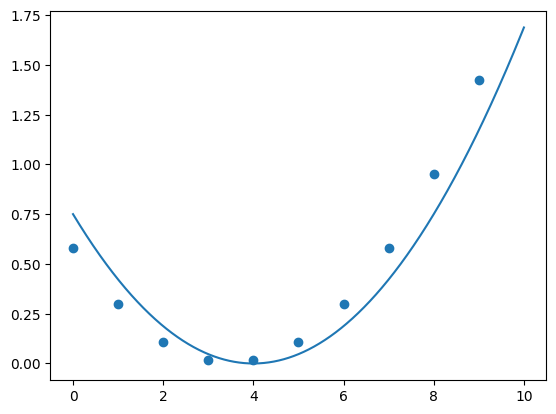

In [325]:
def plot_interval_flow_rates(volume, t1, t2, dt):
    series = interval_flow_rates(volume, t1, t2, dt)
    plt.scatter(
        [t for (t, _) in series],
        [q for (_, q) in series]
    )


# 我们 画出 那些点
plot_interval_flow_rates(volume, 0, 10, 1)
plot_function(flow_rate, 0, 10)

当时间间隔 越小， 就 会越逼近真实的 流速函数

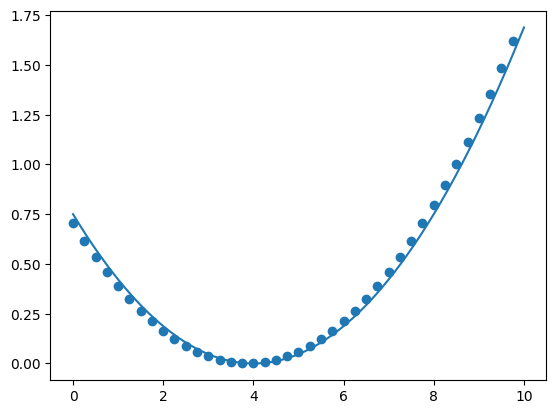

In [326]:
plot_interval_flow_rates(volume, 0, 10, 0.25)
plot_function(flow_rate, 0, 10)

### 2.3 execise

**exec1**: 绘制 油离开邮箱的图

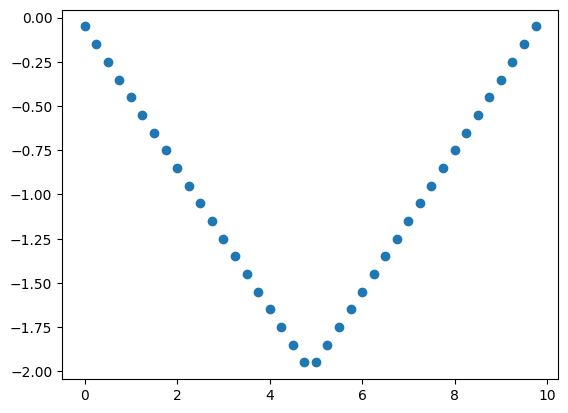

In [327]:
plot_interval_flow_rates(decreasing_volume, 0, 10, 0.25)

**exec2** : 实现 linear_volume_function  函数 . 画图说明流速是恒定的

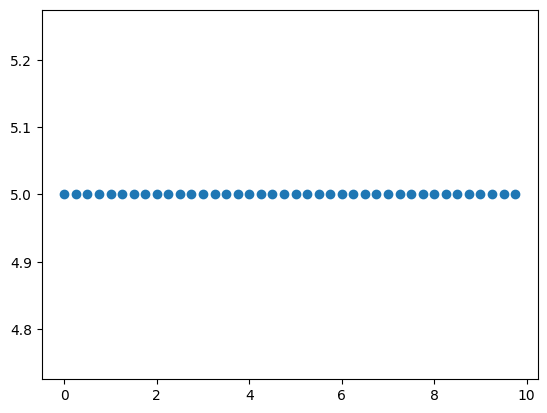

In [328]:
def linear_volume_function(t):
    return 5 * t + 3


plot_interval_flow_rates(linear_volume_function, 0, 10, 0.25)

## 3. 瞬时流速的近似值 .

这个时候要借助 微积分中的 求导 .

先看下逼近 1 这个位置的 平均速率如何计算

In [329]:
print(
    f"""
    1: {average_flow_rate(volume, 0.5, 1.5)}
    2: {average_flow_rate(volume, 0.9, 1.1)}
    3: {average_flow_rate(volume, 0.999, 1.001)}
    4: {average_flow_rate(volume, 0.99999, 1.00001)}

    actual: {flow_rate(1)}
    """
)


    1: 0.42578125
    2: 0.4220312499999988
    3: 0.42187501562509583
    4: 0.4218750000002602

    actual: 0.421875
    


尝试用 代码 去构建近似值 : 如果连续2次的误差小于一定值. 我们就认为这个值合理

In [330]:
def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** (-digits)  #<1> 能容忍的误差
    h = 1
    approx = average_flow_rate(v, t - h, t + h)  #<2> 连续2次的误差小于多少位的近似算法
    for i in range(0, 2 * digits):  #<3>
        h = h / 10
        next_approx = average_flow_rate(v, t - h, t + h)  #<4>
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)  #<5>
        else:
            approx = next_approx  #<6>
    raise Exception("Derivative did not converge")  #<7>

In [331]:
print(instantaneous_flow_rate(volume, 1))

0.421875


下面要测试 和 求导函数 结果基本一样

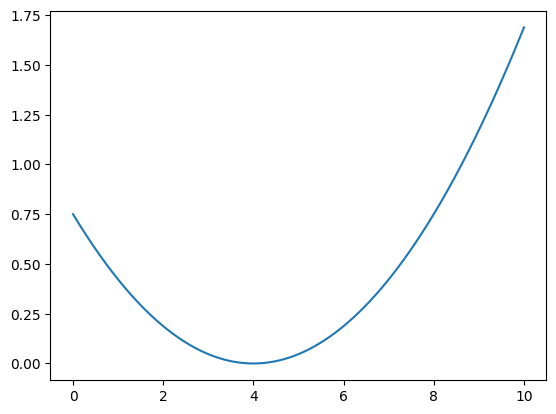

In [332]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(volume, t)

    return flow_rate_function


plot_function(flow_rate, 0, 10)
plot_function(get_flow_rate_function(volume), 0, 10)

$$
f^{'}(x) = \frac{\mathrm{d} y}{\mathrm{d} x} = \frac{\mathrm{d}}{\mathrm{d} x}f(x)
$$

- 其中 df 和 dx 代表的是 f 和 x 的无限小变化 .
- 后一个 d/dx 看起来 像是 应用在 f(x) 上的运算, 也就是特别的说明是 1个求导的操作 .

## 4. 体积变化的近似值

In [333]:
def small_volume_change(q, t, dt):
    return q(t) * dt

In [334]:
small_volume_change(flow_rate, 2, 1)

0.1875

In [335]:
volume(3) - volume(2)

0.109375

In [336]:
small_volume_change(flow_rate, 2, 0.01)

0.001875

In [337]:
volume(2.01) - volume(2)

0.0018656406250001645

上面的结果中 直接用 流速 * 时间 在长时间内不理想， 在短时间内比较理想.

所以自然的想法是:

- 分为足够小的 间隔
- 把他们加起来得到 累积的值 .


利用 `python` 给我们提供的库可以做到这一点 . 先分 然后求和

In [338]:
def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt)
               for t in np.arange(t1, t2, dt))


volume_change(flow_rate, 0, 10, 0.1)

4.32890625

In [339]:
volume(10) - volume(0)

4.375

In [340]:
# 分为  0.0001 的时候就很接近le
volume_change(flow_rate, 0, 10, 0.0001)

4.3749531257812455

和求导的过程一样 我们可以让时间的 间隔变的足够的小.

然后 + 起来就是了 .

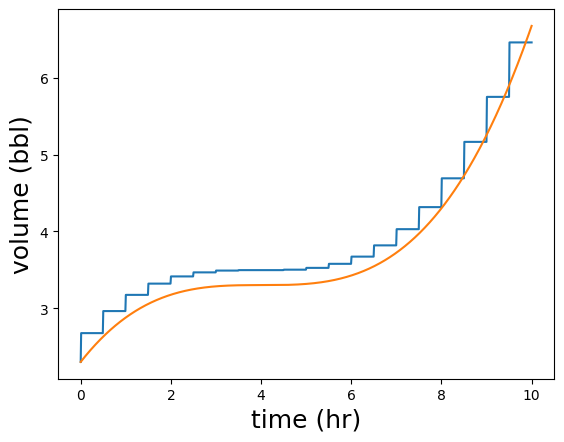

In [341]:
def approximate_volume(q, v0, dt, T):
    """
    从 0, T 的 时间点, 按照 dt 划分
    @param q : 速率函数
    @param v0 : 开始的体积
    """
    return v0 + volume_change(q, 0, T, dt)


def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)

    return volume_function


# 基于速率 的 近似图
plot_volume(
    approximate_volume_function(flow_rate, 2.3, 0.5),
    0,
    10)
# 原图
plot_volume(volume, 0, 10)

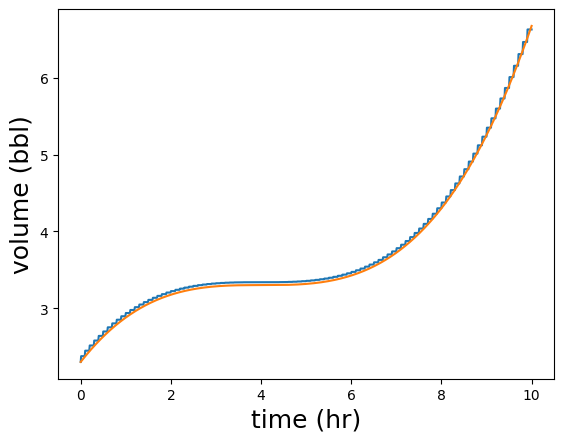

In [342]:
# 精度越高， 越逼近
plot_volume(approximate_volume_function(flow_rate, 2.3, 0.1), 0, 10)
plot_volume(volume, 0, 10)

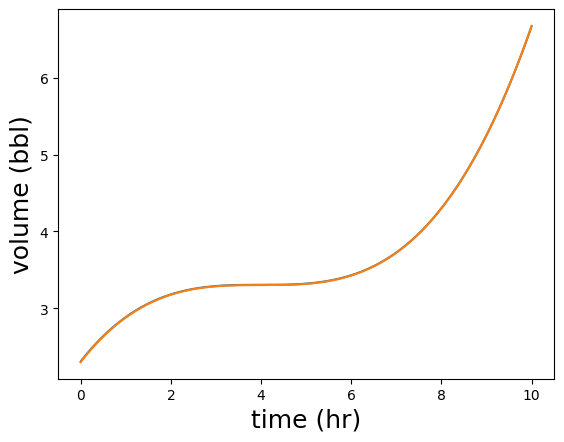

In [343]:
plot_volume(approximate_volume_function(flow_rate, 2.3, 0.01), 0, 10)
plot_volume(volume, 0, 10)

同样, 我们可以用近似的方法来计算 新的 volume 函数 .

- 只要连续2次的计算就不超过多少位

In [344]:
def get_volume_function(q, v0, digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q, 0, T, dt)
        for i in range(0, digits * 2):
            dt = dt / 10
            next_approx = v0 + volume_change(q, 0, T, dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx, digits)
            else:
                approx = next_approx
        raise Exception("Did not converge!")

    return volume_function

In [345]:
v = get_volume_function(flow_rate, 2.3, digits=3)

In [346]:
print(
    f"""
    v1:{v(1)}
    """
)


    v1:2.878
    


## 5. 定积分和不定积分


定积分可以根据 一个函数的导数求得这个函数在某个时间段内的总变化值 .

- 1 个函数
- start 和 end

可以确定1个定积分 . 输出是1个数 表示的是累积的变化值 .

如果 f(x) 是要求导的函数. f(b) - f(a) 变化值可以用

导数: $$f_{'}$$ 来计算 . 而定积分标记如下:

$$
\int_a^b f^{'}(x) \mathrm{d} x
$$

volume_change 函数和 定积分类似, 近似于流速图下面的面积.

- 事实上, 一个函数在 1个时间段内的定积分 =流速图下面的面积 .


不定积分 根据1个函数的 导数来 计算原函数 .

- 需要导数还不够 ， 还需要1个初始值. 例如 f(0)

$$
f(x) - f(0) = \int_0^x f^{'}(x) \mathrm{d} x
$$

我们标记 不定积分 就没有确定的边界.

$$
f(x) = \int f^{'}(x) \mathrm{d} x
$$


如果
$$
g(x) =  \int f(x) \mathrm{d} x
$$

那么就说 g(x) 是 f(x) 的反导数.

- 反导数并不是唯一的.
- 他们的共同点 仅仅是 差值相同.
- 也就是说, 任意的初始值 g(0) 都不会影响 他的 导数 = f(x)

## 小结

- 一个函数的平均变化率 是什么
- 平均变化率 可以通过 割线 ： 也就是通过函数图形 2点的直线 的斜率来表示
- 放大 一个平滑函数的图形， 他看起来和一条直线没有区别 . 这条直线就是函数的 最佳线性近似， 他的斜率称为 函数的导数
- 可以 通过在 包含该点的 连续 小间隔上 取割线的 斜率来逼近导数 ； 着近似于函数在 该点 函数近似的变化率
- 已知1个函数的导数， 如果把时间 分为 多个小的间隔， 而且假设每个间隔上的变化率是 恒定的， 就可以 计算 函数随 时间的变化， 如果每个间隔足够小， 变化率就会近似恒定， 把他们加起来， 就能得到总的变化量， 这近似于函数的 定积分
- 已经知道 1个函数的初始值， 并在不同的间隔上求变化率的定积分， 可以得到这个函数， 叫做函数的不定积分